# Predicting-F1-Champion-2025

| Column                   | Description                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| `Season`                 | The year of the Formula 1 season (e.g., 2018).                              |
| `Round`                  | The race number in the season (e.g., 1st round of the season).              |
| `Circuit`                | Full name of the race track or circuit where the race took place.           |
| `Race Name`              | Official name of the race (e.g., “Australian Grand Prix”).                  |
| `Date`                   | The date when the race occurred.                                            |
| `Time_of_race`           | Starting time of the race (in UTC or Zulu time format).                     |
| `Location`               | City where the race was held.                                               |
| `Country`                | Country where the circuit is located.                                       |
| `Driver`                 | Full name of the driver who participated in the race.                       |
| `Constructor`            | The F1 team or manufacturer (e.g., Ferrari, Mercedes).                      |
| `Abbreviation`           | Driver's short 3-letter code (e.g., VET = Vettel).                          |
| `Laps`                   | Total number of laps the driver completed during the race.                  |
| `Position`               | Final race position (1 means the winner).                                   |
| `Lap Time Variation`     | Variability in the lap times (lower is more consistent).                    |
| `Position Changes`       | Number of positions gained or lost during the race.                         |
| `Fast Lap Attempts`      | How many times the driver attempted fastest laps.                           |
| `TotalPitStops`          | Number of times the driver pitted (alternate spelling: Total Pit Stops).    |
| `AvgPitStopTime`         | Average time taken for each pit stop (in seconds).                          |
| `Stint`                  | The stint number (run between two pit stops).                              |
| `Stint Length`           | Number of laps in the current stint.                                        |
| `Tire Compound`          | Type of tire used (e.g., SOFT, ULTRASOFT, MEDIUM).                          |
| `Pit_Lap`                | Lap on which the pit stop occurred.                                         |
| `Pit_Time`               | Duration of that specific pit stop (in seconds).                            |
| `Air_Temp_C`             | Air temperature in Celsius.                                                 |
| `Track_Temp_C`           | Track surface temperature in Celsius.                                       |
| `Humidity_%`             | Humidity level in percentage.                                               |
| `Wind_Speed_KMH`         | Wind speed in kilometers per hour.                                          |
| `Tire Usage Aggression`  | How aggressively the driver used their tires (higher = more wear).          |
| `Driver Aggression Score`| A metric indicating overall driving aggression.                             |


-------

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

## Load Dataset

In [2]:
df = pd.read_csv('../Predicting-F1-Champion-2025/f1_pitstops_2018_2024.csv')
df.head()

Season  Round                         Circuit                Driver  \
0    2018      1  Albert Park Grand Prix Circuit      Sebastian Vettel   
1    2018      1  Albert Park Grand Prix Circuit      Sebastian Vettel   
2    2018      1  Albert Park Grand Prix Circuit        Lewis Hamilton   
3    2018      1  Albert Park Grand Prix Circuit        Lewis Hamilton   
4    2018      1  Albert Park Grand Prix Circuit  Kimi RÃƒÂ¤ikkÃƒÂ¶nen   

  Constructor  Laps  Position  TotalPitStops  AvgPitStopTime  \
0     Ferrari    58         1              1          21.787   
1     Ferrari    58         1              1          21.787   
2    Mercedes    58         2              1          21.821   
3    Mercedes    58         2              1          21.821   
4     Ferrari    58         3              1          21.421   

               Race Name  ... Tire Usage Aggression Fast Lap Attempts  \
0  Australian Grand Prix  ...              0.017241          44.76882   
1  Australian Grand Prix  ...              0.017241          44.76882   
2  Australian Grand Prix  ...              0.017241          44.73482   
3  Australian Grand Prix  ...              0.017241          44.73482   
4  Australian Grand Prix  ...              0.017241          45.13482   

  Position Changes Driver Aggression Score  Abbreviation  Stint  \
0         0.000000                6.755003           VET    1.0   
1         0.000000                6.755003           VET    2.0   
2         0.043478                6.754254           HAM    1.0   
3         0.043478                6.754254           HAM    2.0   
4         0.086957                6.818562           RAI    1.0   

   Tire Compound  Stint Length  Pit_Lap     Pit_Time  
0      ULTRASOFT          25.0     26.0       21.787  
1           SOFT          32.0      NaN  Final Stint  
2      ULTRASOFT          17.0     19.0       21.821  
3           SOFT          39.0      NaN  Final Stint  
4      ULTRASOFT          17.0     18.0       21.421  

[5 rows x 30 columns]

----------

## Data Preprocessing

### Data Summary

In [3]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7374 entries, 0 to 7373
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Season                   7374 non-null   int64  
 1   Round                    7374 non-null   int64  
 2   Circuit                  7374 non-null   object 
 3   Driver                   7374 non-null   object 
 4   Constructor              7374 non-null   object 
 5   Laps                     7374 non-null   int64  
 6   Position                 7374 non-null   int64  
 7   TotalPitStops            7374 non-null   int64  
 8   AvgPitStopTime           7189 non-null   float64
 9   Race Name                7001 non-null   object 
 10  Date                     7001 non-null   object 
 11  Time_of_race             7001 non-null   object 
 12  Location                 7001 non-null   object 
 13  Country                  7001 non-null   object 
 14  Air_Temp_C              

count         mean         std          min  \
Season                   7374.0  2021.308245    1.969604  2018.000000   
Round                    7374.0    10.673312    6.135126     1.000000   
Laps                     7374.0    56.643748   13.922667     0.000000   
Position                 7374.0    10.156089    5.590062     1.000000   
TotalPitStops            7374.0     2.068348    1.135088     0.000000   
AvgPitStopTime           7189.0   120.109095  268.723688    17.358500   
Air_Temp_C               7001.0    19.520345    5.092982     0.387500   
Track_Temp_C             7001.0    25.207104    5.195562     5.887500   
Humidity_%               7001.0    67.576191   14.157319    18.375000   
Wind_Speed_KMH           7001.0    11.434032    6.073363     3.362500   
Lap Time Variation       7189.0     0.034075    0.088420     0.000266   
Total Pit Stops          7374.0     0.295478    0.162155     0.000000   
Tire Usage Aggression    7308.0     0.038443    0.031907     0.000000   
Fast Lap Attempts        7189.0   124.167364  244.256205     3.191820   
Position Changes         7374.0     0.398091    0.243046     0.000000   
Driver Aggression Score  7189.0    18.757830   36.674194     0.588407   
Stint                    7265.0     2.048727    1.068210     1.000000   
Stint Length             7265.0    20.222987   12.612483     1.000000   
Pit_Lap                  4564.0    26.127082   15.351605     1.000000   

                                 25%          50%          75%          max  
Season                   2020.000000  2021.000000  2023.000000  2024.000000  
Round                       5.000000    11.000000    15.000000    24.000000  
Laps                       52.000000    57.000000    66.000000    87.000000  
Position                    5.000000    10.000000    15.000000    20.000000  
TotalPitStops               1.000000     2.000000     3.000000     7.000000  
AvgPitStopTime             22.388000    24.414000    30.068000  3055.732000  
Air_Temp_C                 15.958333    19.633333    23.750000    33.295833  
Track_Temp_C               21.587500    25.175000    29.504167    39.795833  
Humidity_%                 60.500000    70.500000    77.291667    94.333333  
Wind_Speed_KMH              6.804167     9.408333    15.550000    35.908333  
Lap Time Variation          0.001921     0.002588     0.004448     1.000000  
Total Pit Stops             0.142857     0.285714     0.428571     1.000000  
Tire Usage Aggression       0.019608     0.035088     0.045455     1.000000  
Fast Lap Attempts          40.916320    43.384153    45.331820  2989.176180  
Position Changes            0.173913     0.391304     0.608696     0.826087  
Driver Aggression Score     6.257962     6.623602     6.908705   448.791707  
Stint                       1.000000     2.000000     3.000000     8.000000  
Stint Length               11.000000    19.000000    28.000000    77.000000  
Pit_Lap                    14.000000    26.000000    37.000000    78.000000

- Convert date column type into datetime

In [4]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

Pit_Lap                    38.106862
Track_Temp_C                5.058313
Date                        5.058313
Wind_Speed_KMH              5.058313
Humidity_%                  5.058313
Air_Temp_C                  5.058313
Country                     5.058313
Location                    5.058313
Time_of_race                5.058313
Race Name                   5.058313
Pit_Time                    3.810686
AvgPitStopTime              2.508815
Lap Time Variation          2.508815
Driver Aggression Score     2.508815
Fast Lap Attempts           2.508815
Stint Length                1.478167
Tire Compound               1.478167
Stint                       1.478167
Tire Usage Aggression       0.895037
Total Pit Stops             0.000000
TotalPitStops               0.000000
Driver                      0.000000
Position Changes            0.000000
Constructor                 0.000000
Abbreviation                0.000000
Round                       0.000000
Laps                        0.000000
P

Also we have some missing values in the dataset

In [5]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for i in num_cols:
    print(f'No of unique values {i}: {df[i].nunique()}')
    print(f'{df[i].value_counts()}')
    print(f'{df[i].unique()}')
    print('===============================================')

No of unique values Season: 7
Season
2023    1265
2024    1252
2022    1146
2021    1089
2019     941
2020     883
2018     798
Name: count, dtype: int64
[2018 2019 2020 2021 2022 2023 2024]
No of unique values Round: 24
Round
11    442
3     427
13    419
9     410
15    406
1     403
6     394
10    370
4     351
17    347
2     346
5     337
14    336
16    333
7     321
8     320
12    271
19    256
18    246
22    216
21    161
20    134
23     80
24     48
Name: count, dtype: int64
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 20 22 23 24]
No of unique values Laps: 78
Laps
57    616
70    576
52    573
56    542
53    487
     ... 
34      4
75      4
21      4
10      3
19      3
Name: count, Length: 78, dtype: int64
[58 57 24 22 13  5  4 56 35  3  1 51 48 42 39 10  0 66 65 64 63 45 38 25
 78 77 76 70 52 68 67 40 53 50 27 71 69 62 54 11 46 37 31 18 49 44 43 28
  8 23  9 61 60 59 55  2  6 29 16 41 33 34 26 14  7 20 17 15 30 12 47 87
 32 75 36 72 19 21]
No of unique

- We have data from 2018 to 2024
- Total 24 rounds
- 78 laps
- 20 positions
- 8 pitstops
- 8 stints
- 71 pit laps

In [6]:
cat_cols = df.select_dtypes(include=['object']).columns

for i in cat_cols:
    print(f'No of unique values {i}: {df[i].nunique()}')
    print(f'{df[i].value_counts()}')
    print(f'{df[i].unique()}')
    print('===============================================')

No of unique values Circuit: 31
Circuit
Bahrain International Circuit            507
Red Bull Ring                            468
Silverstone Circuit                      432
Circuit de Barcelona-Catalunya           402
Hungaroring                              396
Autodromo Nazionale di Monza             321
Circuit of the Americas                  308
Circuit de Spa-Francorchamps             307
Circuit Park Zandvoort                   306
Baku City Circuit                        300
Suzuka Circuit                           288
Yas Marina Circuit                       285
Circuit de Monaco                        275
Albert Park Grand Prix Circuit           257
Circuit Gilles Villeneuve                242
AutÃƒÂ³dromo Hermanos RodrÃƒÂ­guez       234
Autodromo Enzo e Dino Ferrari            218
Marina Bay Street Circuit                217
Losail International Circuit             204
Jeddah Corniche Circuit                  189
Sochi Autodrom                           182
Circuit Paul Ri

- Total 31 Circuits
- 40 Drivers
- 16 Contructors
- 27 Locations
- 24 Countries 

----------

### Data Errors Handling

- Convert the Date columns into datetime format
- Convert the Time of race column into time format

In [7]:
df['Date']=pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = df['Date'].dt.date


df['Time_of_race'] = pd.to_datetime(df['Time_of_race'], errors='coerce')
df['Time_of_race'] = df['Time_of_race'].dt.time

We have in Pit time column has some error values `Final Stint` so we remove and fill with random value.

In [8]:
valid_pit_times = pd.to_numeric(df['Pit_Time'], errors='coerce')
valid_values = valid_pit_times.dropna().values  

mask = df['Pit_Time'] == 'Final Stint'
num_final_stints = mask.sum()

random_pit_times = np.random.choice(valid_values, size=num_final_stints, replace=True)
df.loc[mask, 'Pit_Time'] = random_pit_times

df['Pit_Time'] = pd.to_numeric(df['Pit_Time'])

--------

In [9]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

Pit_Lap                    38.106862
Track_Temp_C                5.058313
Date                        5.058313
Wind_Speed_KMH              5.058313
Humidity_%                  5.058313
Air_Temp_C                  5.058313
Country                     5.058313
Location                    5.058313
Time_of_race                5.058313
Race Name                   5.058313
Pit_Time                    3.810686
AvgPitStopTime              2.508815
Lap Time Variation          2.508815
Driver Aggression Score     2.508815
Fast Lap Attempts           2.508815
Stint Length                1.478167
Tire Compound               1.478167
Stint                       1.478167
Tire Usage Aggression       0.895037
Total Pit Stops             0.000000
TotalPitStops               0.000000
Driver                      0.000000
Position Changes            0.000000
Constructor                 0.000000
Abbreviation                0.000000
Round                       0.000000
Laps                        0.000000
P

### Handling Missing Values

<Axes: >

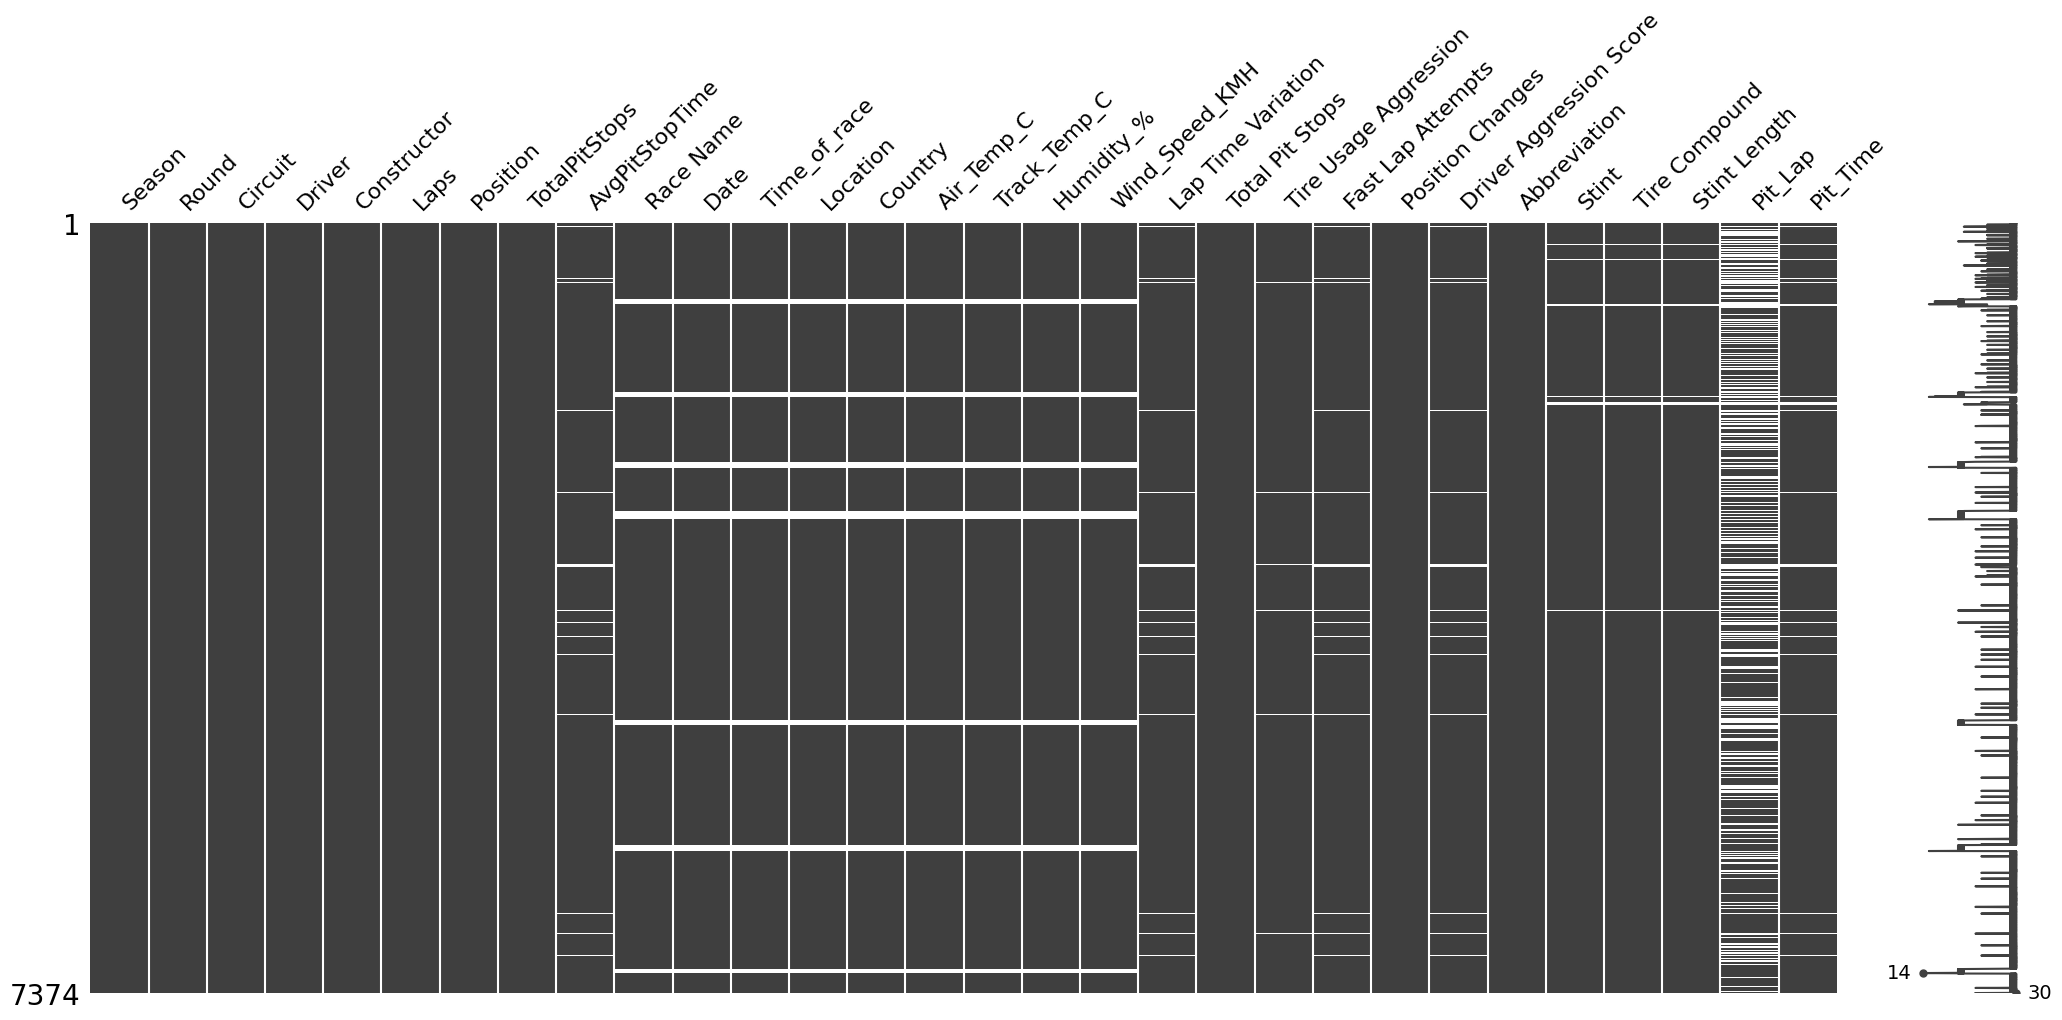

In [10]:
import missingno as msn
msn.matrix(df)

We remove the Pit Lap from the data bcz it has to much missing values and if we fill it it can generate some biasnes

In [11]:
df.drop(columns=['Pit_Lap'],inplace=True)

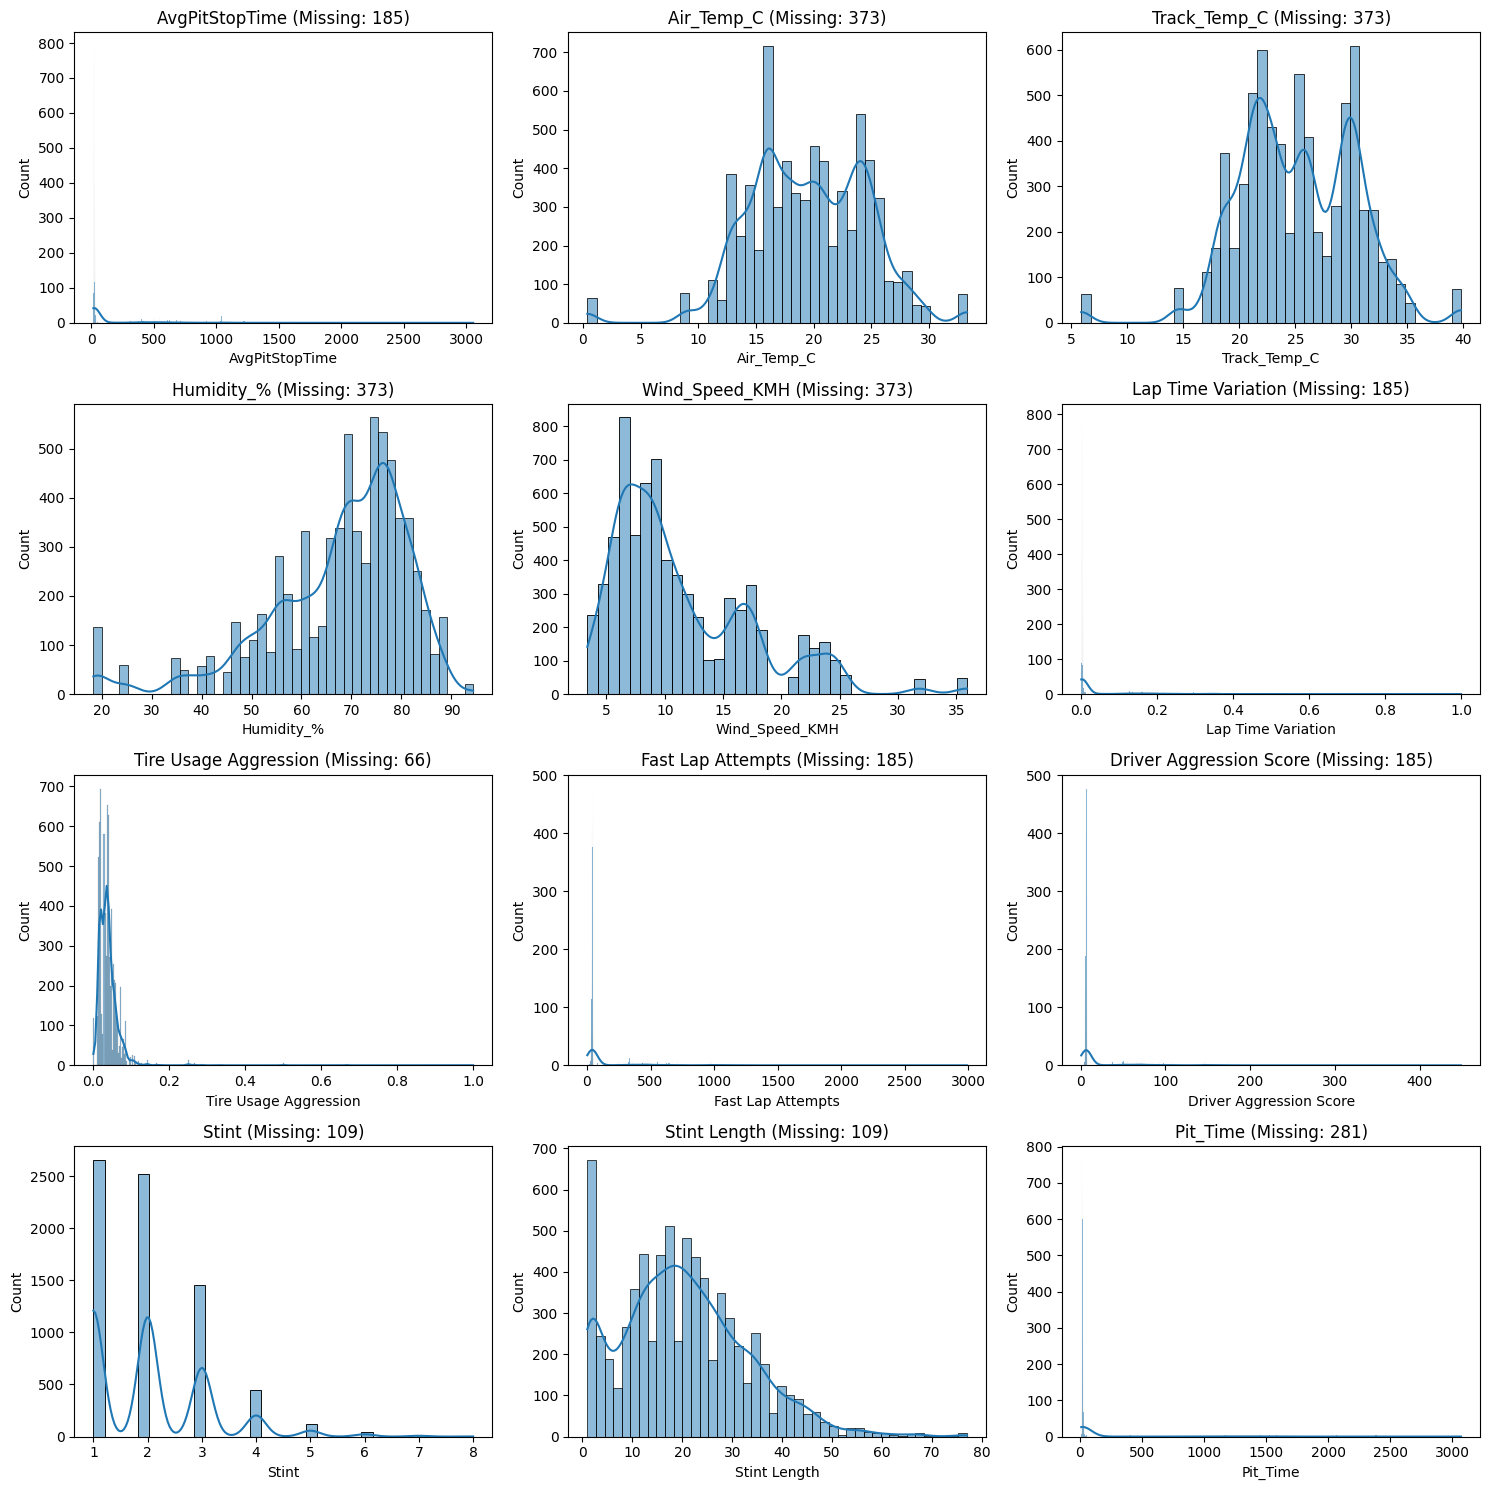

In [12]:
num_cols = df.select_dtypes(include=['number'])

missing_cols = [col for col in num_cols.columns if df[col].isnull().any()]

plt.figure(figsize=(15, 15))
for i, col in enumerate(missing_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} (Missing: {df[col].isnull().sum()})")
plt.tight_layout()
plt.show()

Write a condition where the PitStops == 0, then the 'AvgPitStopTime','Lap Time Variation','Total Pit Stops','Tire Usage Aggression','Fast Lap Attempts','Driver Aggression Score', 'Pit_Time' becomes zero.

In [13]:
condition = df['TotalPitStops'] == 0

cols_to_fill = ['AvgPitStopTime','Lap Time Variation','Total Pit Stops','Tire Usage Aggression','Fast Lap Attempts','Driver Aggression Score', 'Pit_Time']

df.loc[condition, cols_to_fill] = 0

In [14]:
for col in df.select_dtypes(include=['number']).columns:
    if df[col].isnull().any():
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

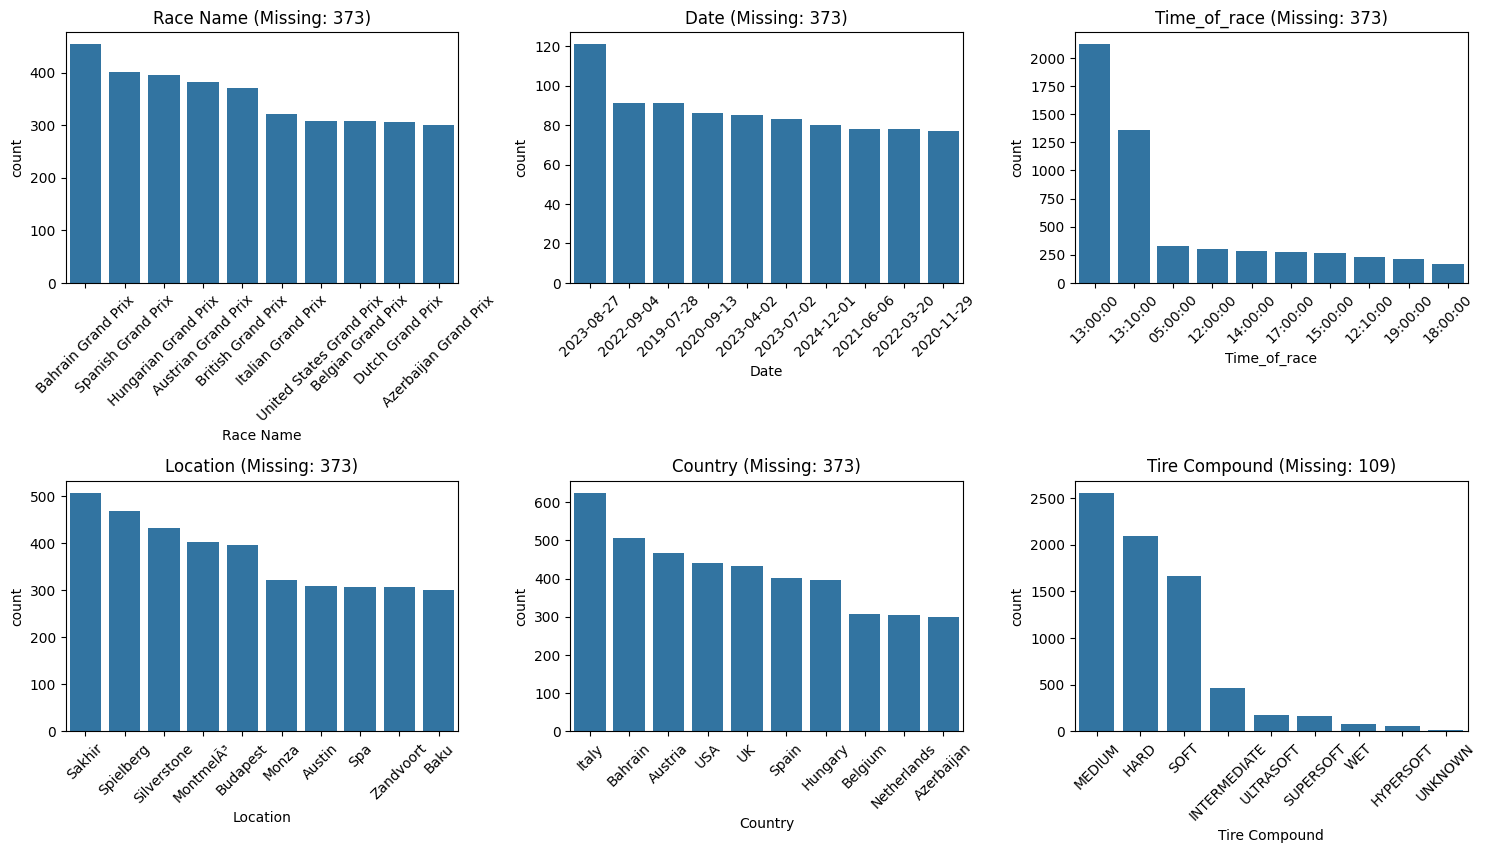

In [15]:
cat_cols = df.select_dtypes(include=['object'])

missing_cols = [col for col in cat_cols.columns if df[col].isnull().any()]

plt.figure(figsize=(15, 12))
for i, col in enumerate(missing_cols):
    plt.subplot(3, 3, i + 1)
    top_10 = df[col].value_counts().nlargest(10).sort_values(ascending=False).index
    sns.countplot(data=df[df[col].isin(top_10)], x=col, order=top_10)
    plt.title(f"{col} (Missing: {df[col].isnull().sum()})")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().any():
        median_value = df[col].mode()[0]
        df[col].fillna(median_value, inplace=True)

------------

In [17]:
df.duplicated().sum()

0

No duplicates

--------

### Handling Outliers

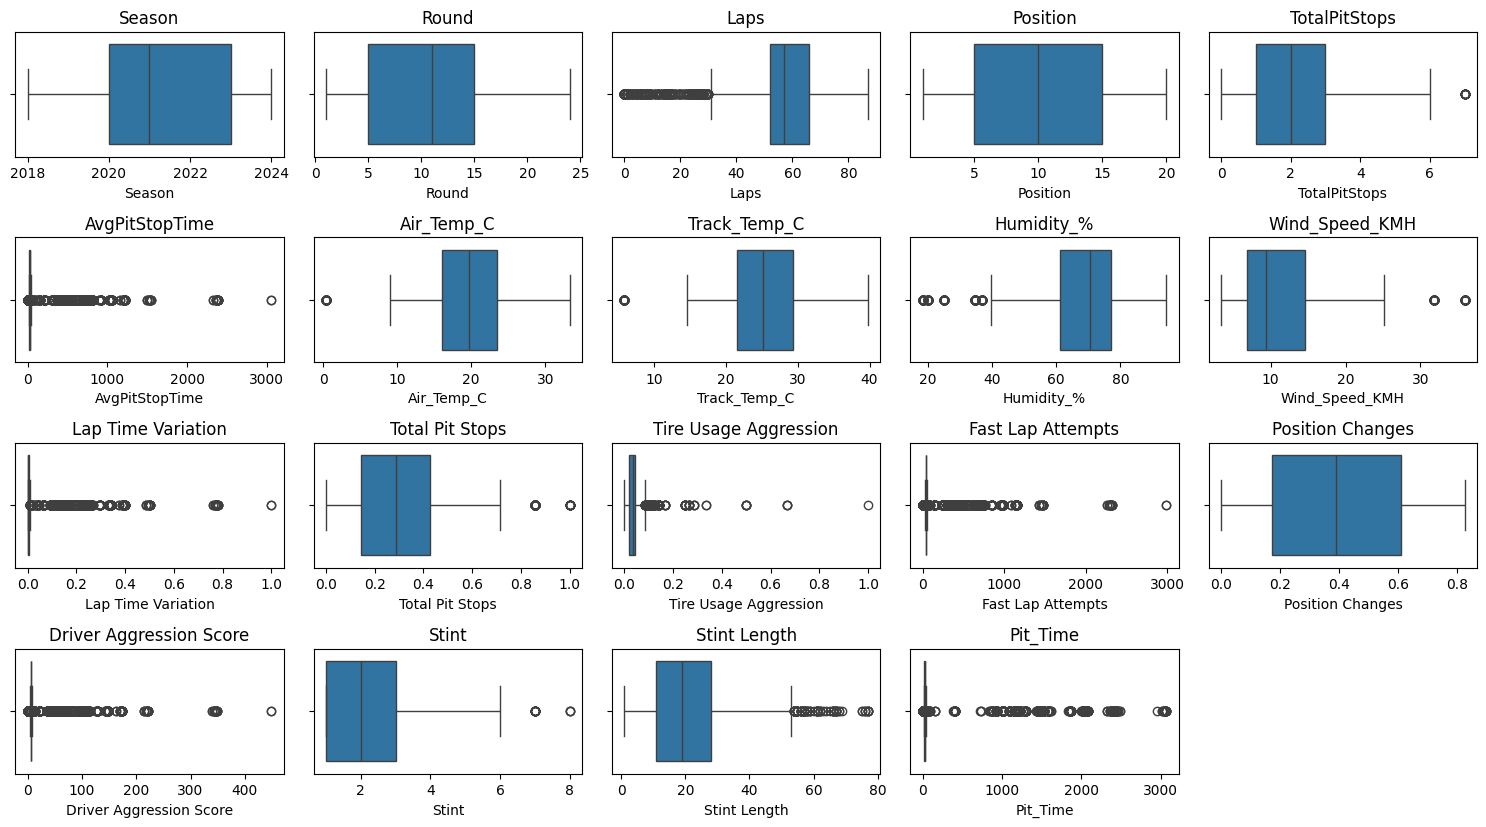

In [18]:
num = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num):
    plt.subplot(5,5,i+1)
    sns.boxplot(data = df, x = col)
    plt.title(col)
plt.tight_layout()
plt.show()

In [19]:
df[df['Tire Usage Aggression'] >= 0.8]

Season  Round                       Circuit        Driver Constructor  \
1437    2019     13  Circuit de Spa-Francorchamps  Carlos Sainz     McLaren   

      Laps  Position  TotalPitStops  AvgPitStopTime           Race Name  ...  \
1437     1        19              1          59.291  Belgian Grand Prix  ...   

     Total Pit Stops Tire Usage Aggression Fast Lap Attempts Position Changes  \
1437        0.142857                   1.0           7.26482         0.782609   

      Driver Aggression Score  Abbreviation  Stint  Tire Compound  \
1437                 1.407917           SAI    1.0           SOFT   

      Stint Length  Pit_Time  
1437           1.0    59.291  

[1 rows x 29 columns]

In [20]:
df = df.drop(index=1437)

Remaining data we keep it, bcz it is not outlier

---------

## Exploratory Data Analysis

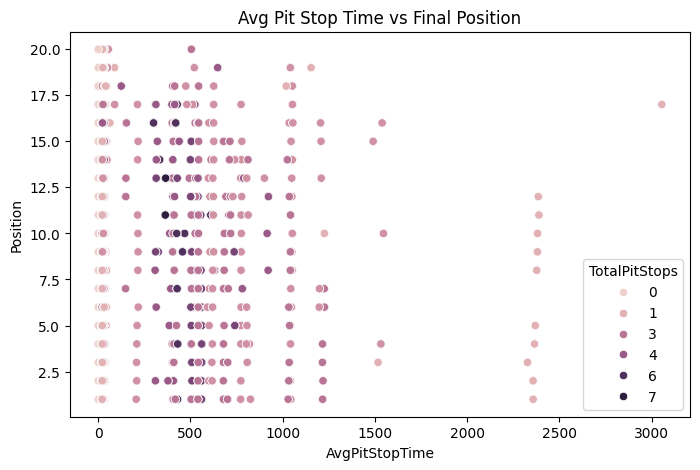

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='AvgPitStopTime', y='Position', hue='TotalPitStops')
plt.title('Avg Pit Stop Time vs Final Position')
plt.show()


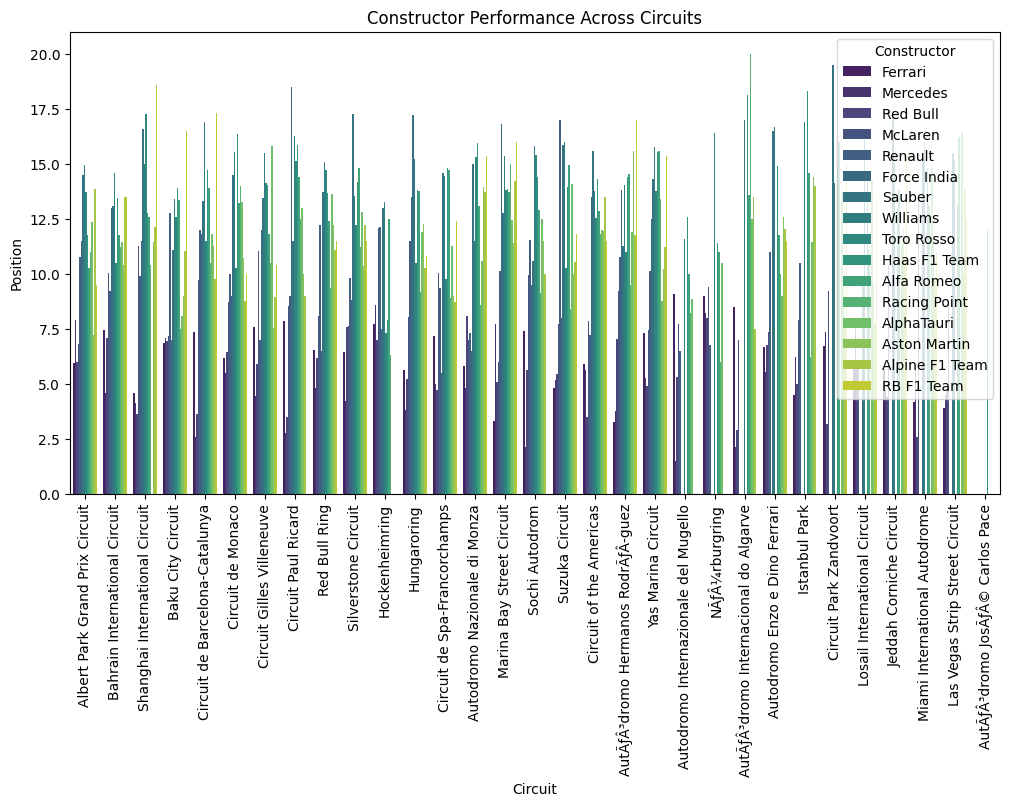

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Circuit', y='Position', hue='Constructor', ci=False, palette='viridis')
plt.title('Constructor Performance Across Circuits')
plt.xticks(rotation=90)
plt.show()


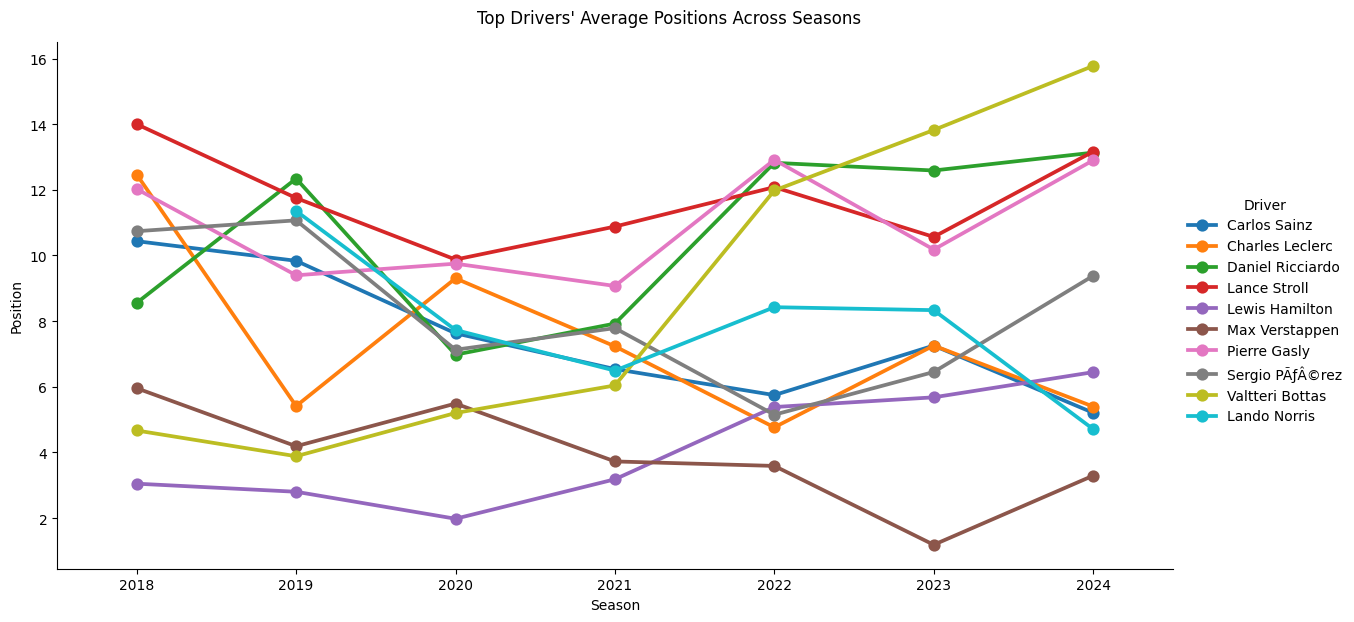

In [23]:
driver_avg = df.groupby(['Season', 'Driver'])['Position'].mean().reset_index()
top_drivers = driver_avg['Driver'].value_counts().nlargest(10).index
filtered_data = driver_avg[driver_avg['Driver'].isin(top_drivers)]

g = sns.catplot(data=filtered_data,x='Season', y='Position',hue='Driver',kind='point',height=6, aspect=2)
g.fig.suptitle("Top Drivers' Average Positions Across Seasons", y=1.03)

plt.show()

Which tire compounds are most used each season?

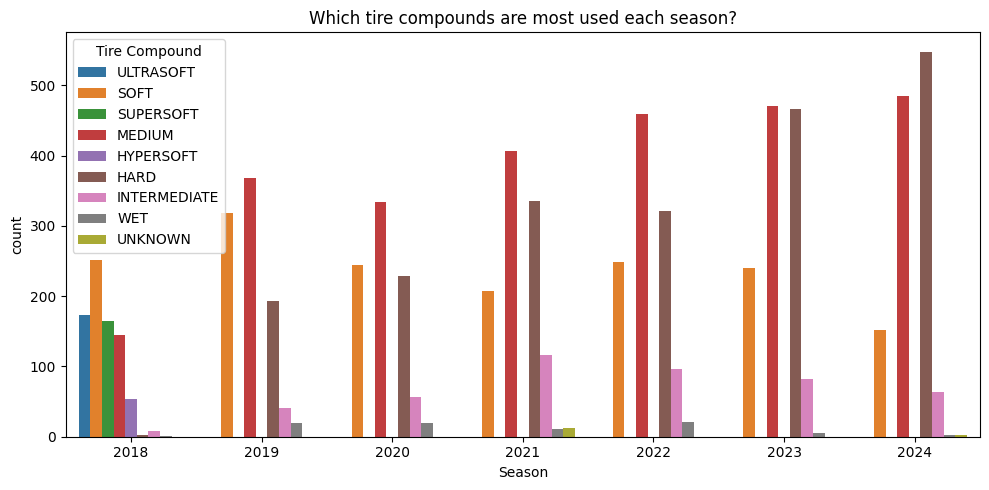

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Season', hue='Tire Compound')
plt.title('Which tire compounds are most used each season?')
plt.tight_layout()
plt.show()

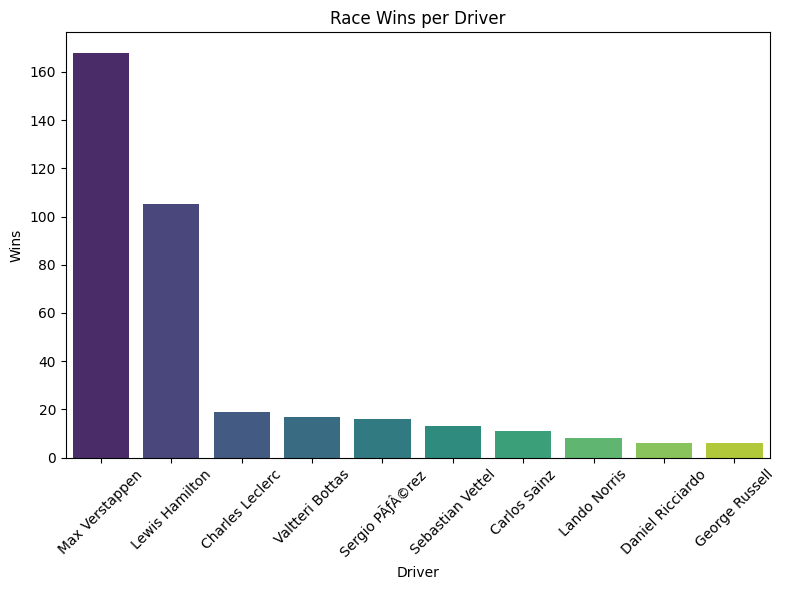

In [25]:
wins = df[df['Position'] == 1].groupby('Driver').size().reset_index(name='Wins')
plt.figure(figsize=(8, 6))
sns.barplot(data=wins.sort_values('Wins', ascending=False).head(10), x='Driver', y='Wins', palette='viridis')
plt.title("Race Wins per Driver")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Feature Engineering

**Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Matrix of Key Champion Predictors')

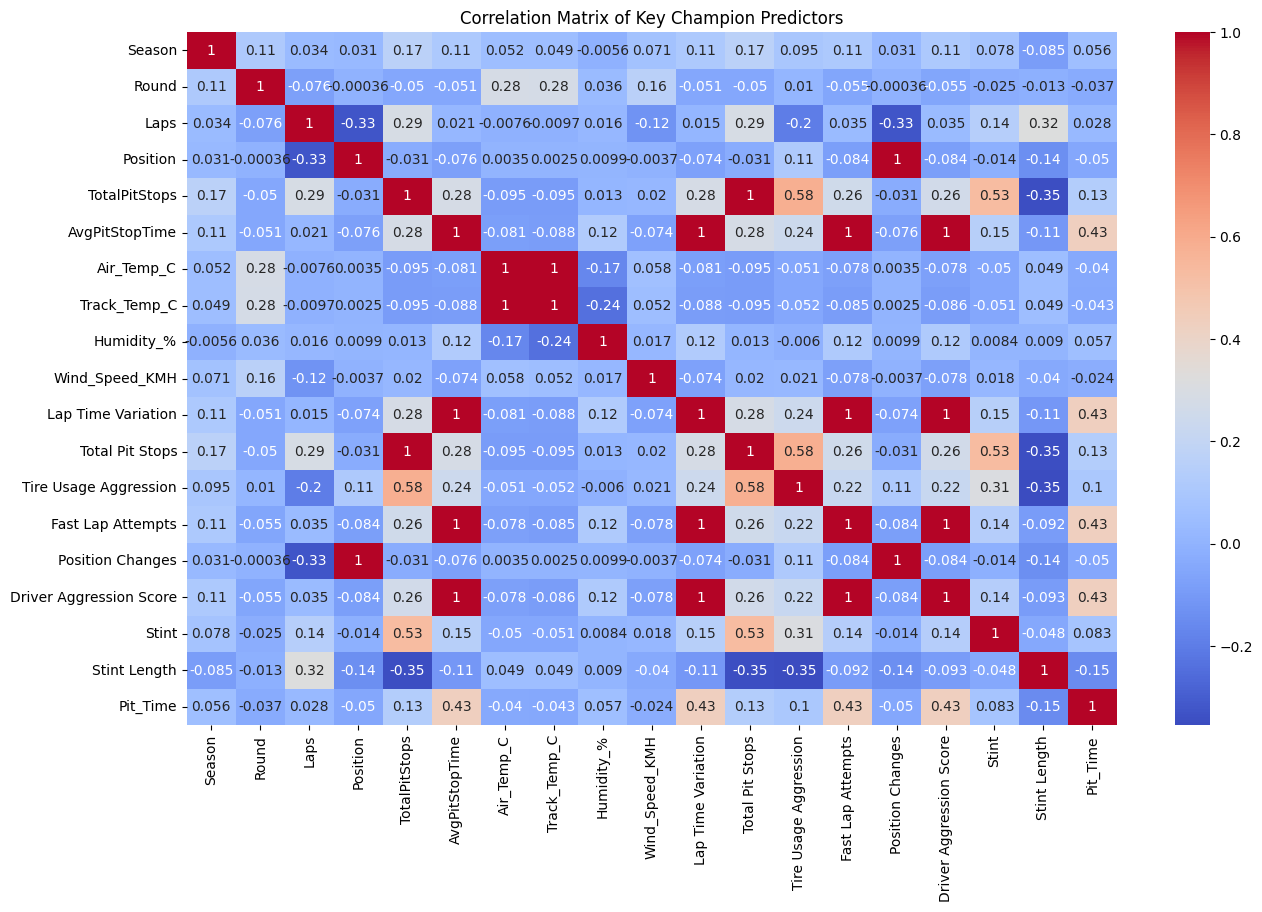

In [26]:
plt.figure(figsize=(15, 9))

sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Key Champion Predictors")

In [27]:
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr().abs()

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

df = df.drop(columns=to_drop)

In [28]:
df.drop(columns=['Date', 'Abbreviation', 'Time_of_race', 'Location', 'Race Name','Tire Compound','Stint','Round', 'Circuit', 'Location', 'Country'], inplace=True)

In [29]:
df['Champion'] = 0
df.loc[df.groupby('Season')['Position'].transform('min') == df['Position'], 'Champion'] = 1

Text(0.5, 1.0, 'Correlation Matrix of Key Champion Predictors')

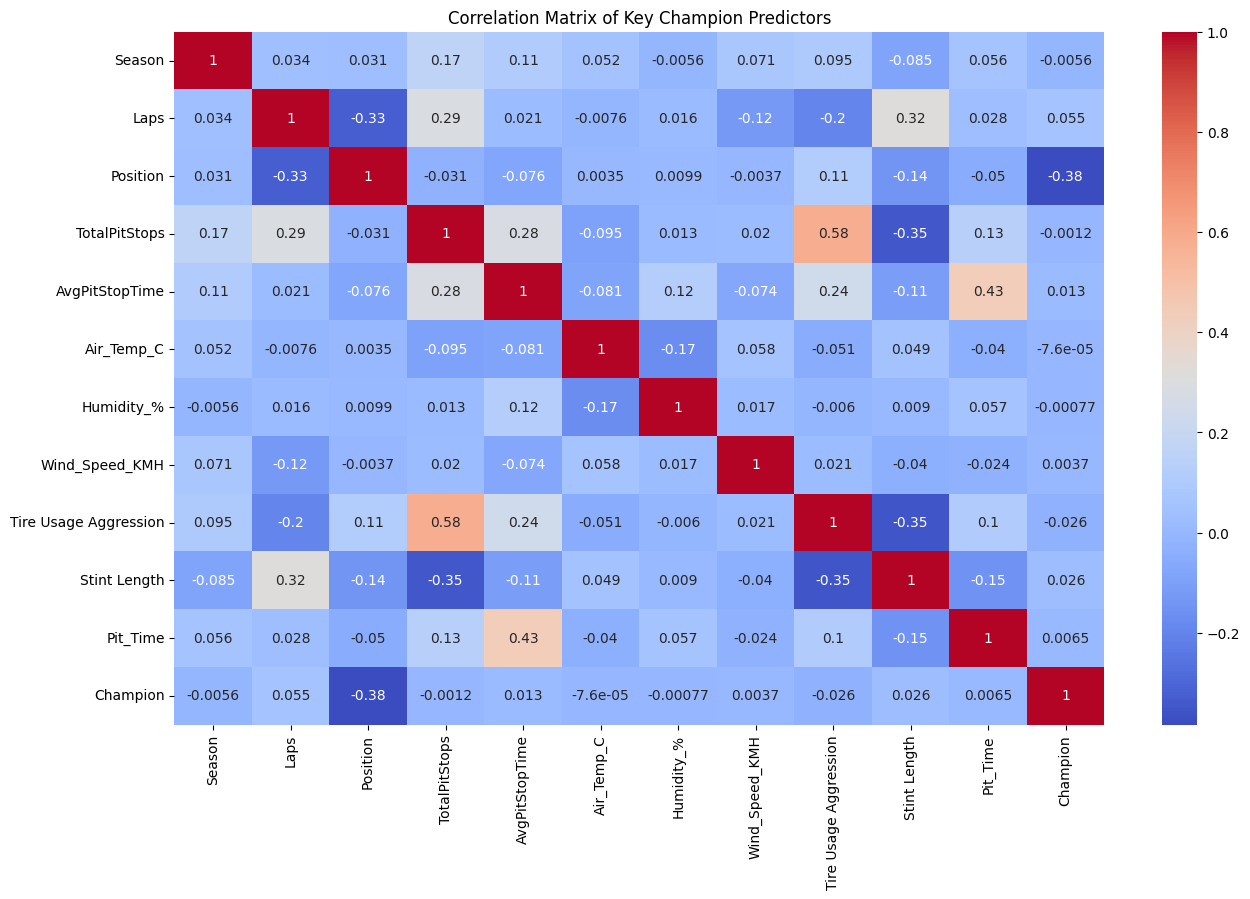

In [30]:
plt.figure(figsize=(15, 9))

sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Key Champion Predictors")

In [31]:
points_dict = {1: 25, 2: 18, 3: 15, 4: 12, 5: 10, 6: 8, 7: 6, 8: 4, 9: 2, 10: 1}
df['RacePoints'] = df['Position'].apply(lambda x: points_dict.get(int(x), 0))

In [32]:
new_df = df.groupby(['Season', 'Driver']).agg({'Constructor': 'first','RacePoints': 'sum','Laps': 'sum','Position': 'min', 
                                               'TotalPitStops': 'sum','AvgPitStopTime': 'mean','Air_Temp_C': 'mean',
                                               'Humidity_%': 'mean','Wind_Speed_KMH': 'mean','Tire Usage Aggression': 'mean',
                                               'Stint Length': 'mean','Pit_Time': 'sum'}).reset_index()


In [33]:
champion_df = new_df.loc[new_df.groupby('Season')['RacePoints'].idxmax()]
champion_df['Champion'] = 1

new_df = new_df.merge(champion_df[['Season', 'Driver', 'Champion']],on=['Season', 'Driver'],how='left')
new_df['Champion'] = new_df['Champion'].fillna(0).astype(int)

In [34]:
champions_per_season = new_df[new_df['Champion'] == 1][['Season', 'Driver', 'Constructor', 'RacePoints']]
champions_per_season = champions_per_season.sort_values('Season').reset_index(drop=True)

champions_per_season

Season          Driver Constructor  RacePoints
0    2018  Lewis Hamilton    Mercedes         793
1    2019  Lewis Hamilton    Mercedes         917
2    2020  Lewis Hamilton    Mercedes         949
3    2021  Lewis Hamilton    Mercedes        1096
4    2022  Max Verstappen    Red Bull        1222
5    2023  Max Verstappen    Red Bull        1567
6    2024  Max Verstappen    Red Bull        1038

**Pairplot**

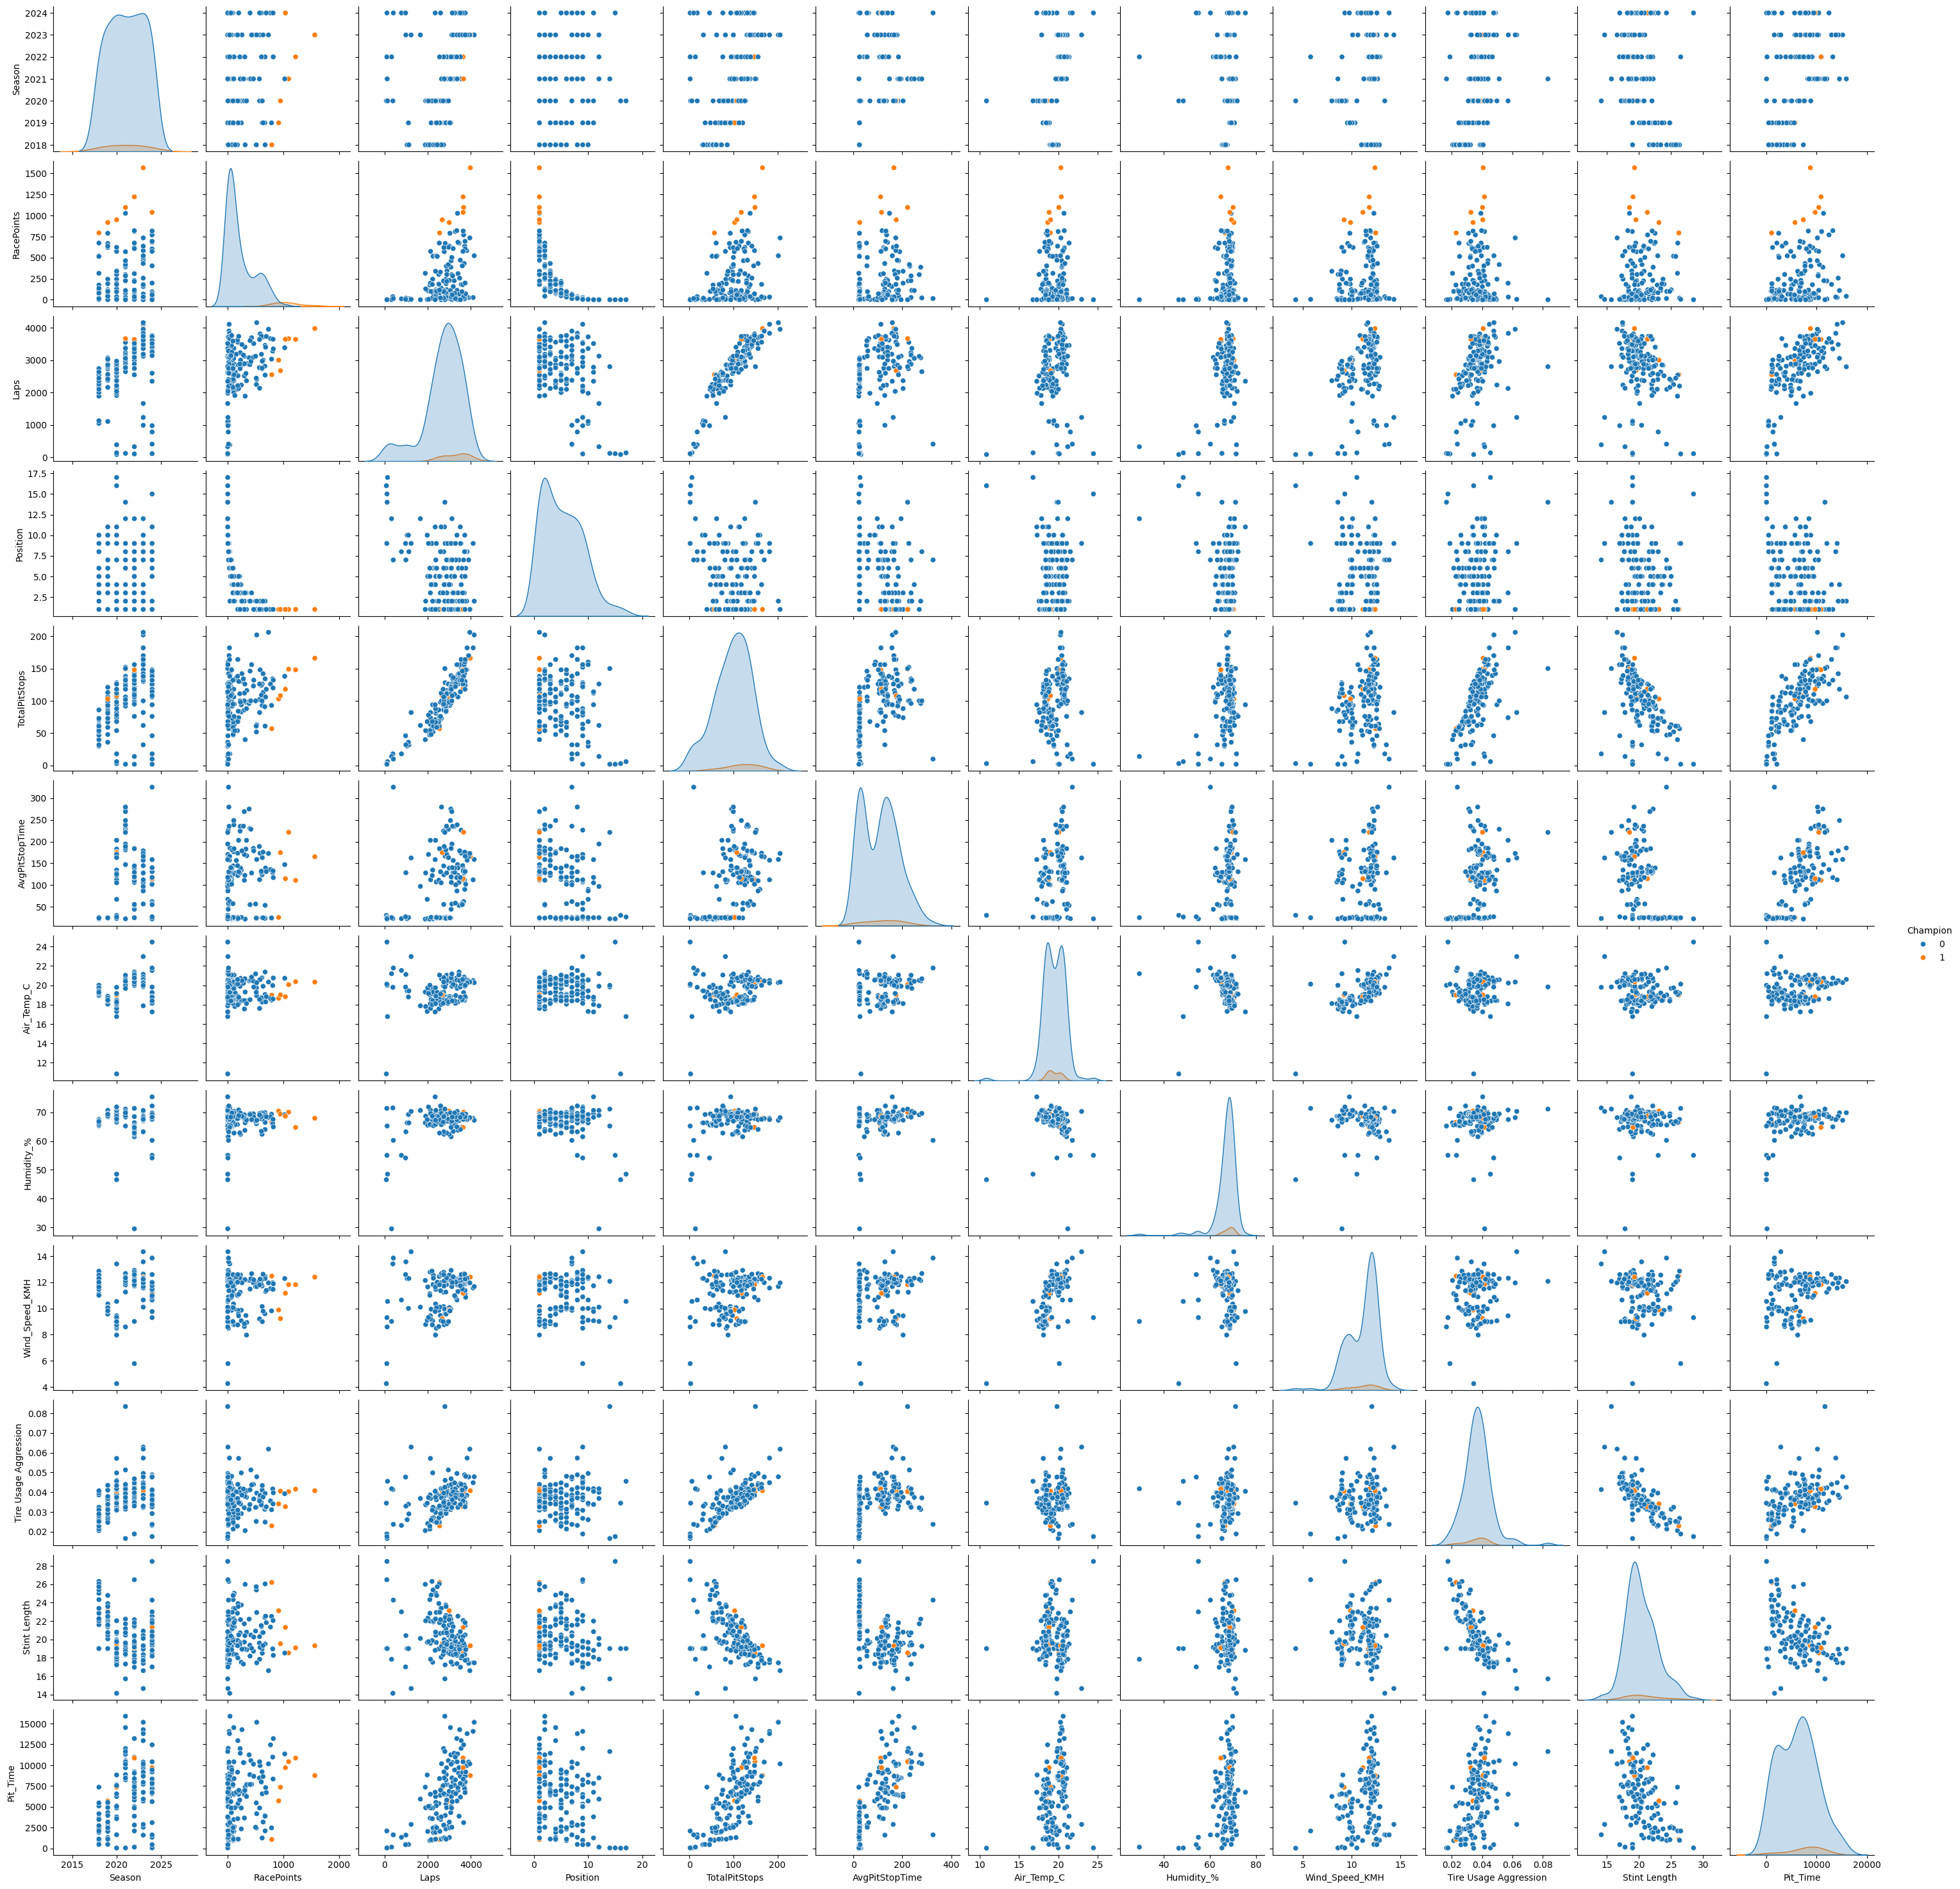

In [35]:
sns.pairplot(new_df, hue='Champion')
plt.show()

In [36]:
new_df['Champion'].value_counts()

Champion
0    145
1      7
Name: count, dtype: int64

-----------

## Model Training

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [92]:
X = new_df.drop('Champion', axis=1)
y = new_df['Champion']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
y_test.value_counts()

Champion
0    28
1     3
Name: count, dtype: int64

In [95]:
trf = ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), ['Driver', 'Constructor']),
                                      ('num', StandardScaler(), ['RacePoints', 'Laps', 'Position','TotalPitStops','AvgPitStopTime',	
                                                                 'Air_Temp_C','Humidity_%','Wind_Speed_KMH','Tire Usage Aggression',	
                                                                 'Stint Length','Pit_Time'])], remainder='passthrough')

In [128]:
models = {'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
          'Random Forest': RandomForestClassifier(random_state=42),
          'KNN': KNeighborsClassifier(n_neighbors=5),
          'Naive Bayes': GaussianNB(priors=2)}


=== Logistic Regression ===
Accuracy: 0.9677
Confusion Matrix:
[[28  0]
 [ 1  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.67      0.80         3

    accuracy                           0.97        31
   macro avg       0.98      0.83      0.89        31
weighted avg       0.97      0.97      0.96        31



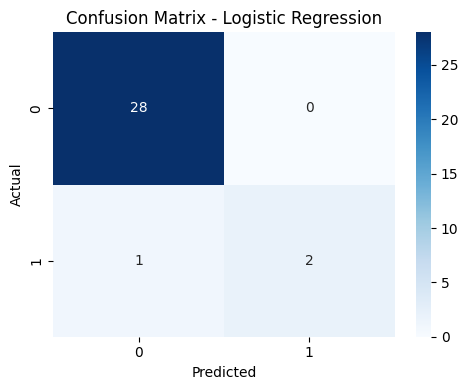


=== Random Forest ===
Accuracy: 0.9355
Confusion Matrix:
[[28  0]
 [ 2  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.33      0.50         3

    accuracy                           0.94        31
   macro avg       0.97      0.67      0.73        31
weighted avg       0.94      0.94      0.92        31



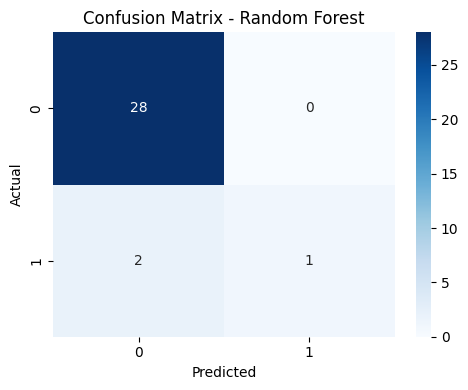


=== KNN ===
Accuracy: 0.8387
Confusion Matrix:
[[25  3]
 [ 2  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.25      0.33      0.29         3

    accuracy                           0.84        31
   macro avg       0.59      0.61      0.60        31
weighted avg       0.86      0.84      0.85        31



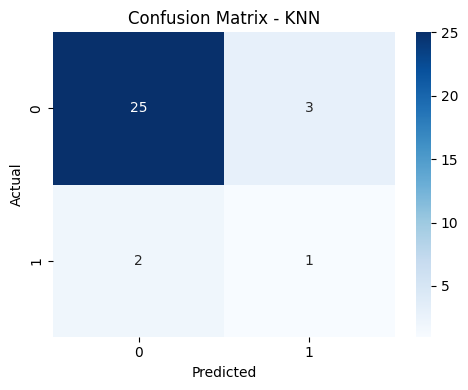


=== Naive Bayes ===
Accuracy: 1.0000
Confusion Matrix:
[[28  0]
 [ 0  3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00         3

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



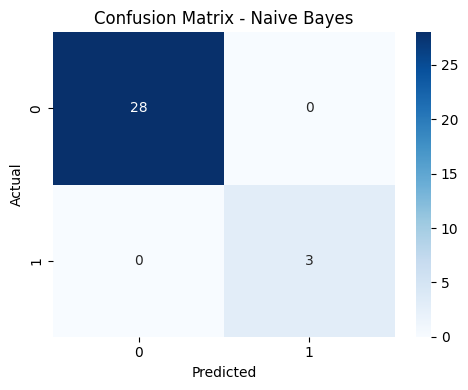

In [97]:
results = {}

for name, model in models.items():
    pipe = ImbPipeline(steps=[
    ('preprocessor', trf),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=3)),
    ('classifier', model)])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    results[name] = {'accuracy': acc, 'conf_matrix': cm}

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

In [149]:
pipelines = {
    'Logistic Regression': ImbPipeline([
        ('preprocessor', trf),
        ('smote', SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)),
        ('classifier', LogisticRegression(random_state=42))]),
    
    'Random Forest': ImbPipeline([
        ('preprocessor', trf),
        ('smote', SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)),
        ('classifier', RandomForestClassifier(random_state=42))]),
    
    'KNN': ImbPipeline([
        ('preprocessor', trf),
        ('smote', SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)),
        ('classifier', KNeighborsClassifier())]),
    
    'Naive Bayes': ImbPipeline([
        ('preprocessor', trf),
        ('smote', SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)),
        ('classifier', GaussianNB())])
}

param_grids = {
    'Logistic Regression': {
        'classifier__penalty': ['l2','l1'],
        'classifier__solver': ['liblinear','saga'],
        'classifier__max_iter': [10,15,20,50]},
    'Random Forest': {
        'classifier__n_estimators': [3,4,5,6],
        'classifier__max_depth': [2,3,4],
        'classifier__min_samples_split': [2,3,5]},
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']},
    'Naive Bayes': {}}



===Logistic Regression===
Best Params: {'classifier__max_iter': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Train Accuracy: 0.9917
Test Accuracy: 0.9677
Train F1 Score: 0.9922
Test F1 Score: 0.9648
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.67      0.80         3

    accuracy                           0.97        31
   macro avg       0.98      0.83      0.89        31
weighted avg       0.97      0.97      0.96        31



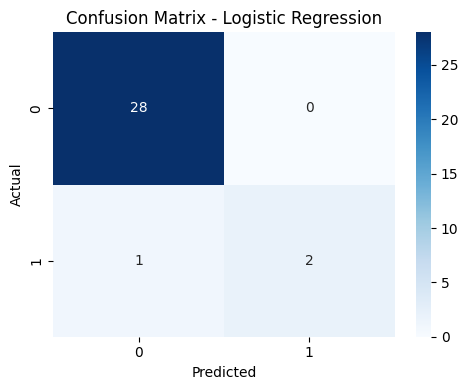


===Random Forest===
Best Params: {'classifier__max_depth': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 3}
Train Accuracy: 0.9669
Test Accuracy: 0.9677
Train F1 Score: 0.9722
Test F1 Score: 0.9648
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.67      0.80         3

    accuracy                           0.97        31
   macro avg       0.98      0.83      0.89        31
weighted avg       0.97      0.97      0.96        31



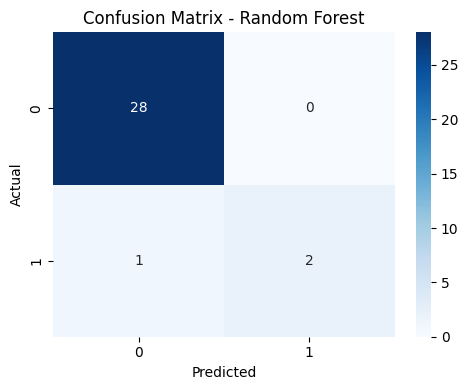


===KNN===
Best Params: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}
Train Accuracy: 0.9835
Test Accuracy: 0.9032
Train F1 Score: 0.9851
Test F1 Score: 0.8944
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.50      0.33      0.40         3

    accuracy                           0.90        31
   macro avg       0.72      0.65      0.67        31
weighted avg       0.89      0.90      0.89        31



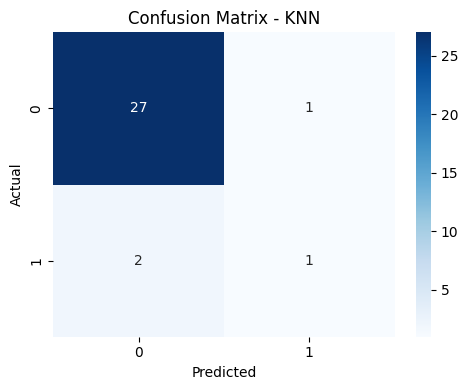


===Naive Bayes===
Best Params: {}
Train Accuracy: 0.9587
Test Accuracy: 1.0000
Train F1 Score: 0.9662
Test F1 Score: 1.0000
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00         3

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



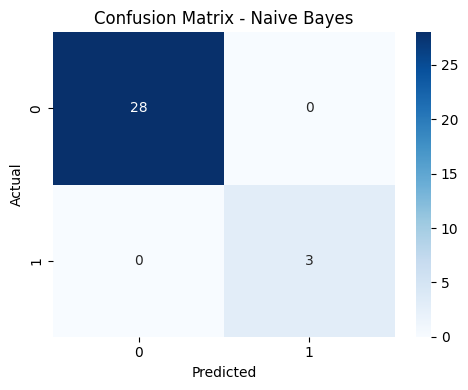

In [154]:
results = {}
best_model_overall = None
best_model_name = None
best_f1_score = 0

for name in pipelines:
    print(f"\n==={name}===")
    grid = GridSearchCV(
        pipelines[name],
        param_grids.get(name, {}),
        cv=5,
        scoring='f1',
        n_jobs=-1)
    
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)


    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f"Best Params: {grid.best_params_}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Train F1 Score: {train_f1:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}")
    print("Classification Report (Test):")
    print(classification_report(y_test, y_test_pred))

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    results[name] = {'Best Params': grid.best_params_,'Train Accuracy': train_acc,'Test Accuracy': test_acc,'Train F1': train_f1,
                     'Test F1': test_f1,'Confusion Matrix': cm,'Model': best_model}

---------

In [153]:
df_2025_sim = (new_df.groupby(['Driver', 'Constructor']).agg({
        'RacePoints': 'mean',
        'Laps': 'mean',
        'Position': 'mean',
        'TotalPitStops': 'mean',
        'AvgPitStopTime': 'mean',
        'Air_Temp_C': 'mean',
        'Humidity_%': 'mean',
        'Wind_Speed_KMH': 'mean',
        'Tire Usage Aggression': 'mean',
        'Stint Length': 'mean',
        'Pit_Time': 'mean'}).reset_index())

logistic_model = results['Logistic Regression']['Model']

df_2025_sim['Season'] = 2025
df_2025_sim['Champion_Prob'] = logistic_model.predict_proba(df_2025_sim)[:, 1]

top5 = df_2025_sim[['Driver', 'Constructor', 'Champion_Prob']].sort_values(by='Champion_Prob', ascending=False).head(5)

print("🏁 Top 5 Predicted Champions:")
print(top5)


🏁 Top 5 Predicted Champions:
             Driver Constructor  Champion_Prob
42   Max Verstappen    Red Bull       0.667189
37   Lewis Hamilton    Mercedes       0.572222
70  Valtteri Bottas    Mercedes       0.063877
0   Alexander Albon    Red Bull       0.026042
5      Carlos Sainz     Ferrari       0.023444


--------

**Observations**

**Logistic Regression**
- Excellent generalization (train ≈ test)
- Reasonably good recall on class 1 (minority): 0.67
- Balanced performance across classes

**Random Forest & KNN**
- Perfectly fitting training data (especially RF), but fails completely to recognize the minority class in test set
- Despite class_weight='balanced', no true positives for class 1
- Classic signs of overfitting + imbalance issue

**Naive Bayes**
- Suspiciously perfect on test set
- Only 3 positive samples in the test set → easily overfit
- Likely trained on data too similar to test, or leakage via preprocessing